# Take Home

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose, STL

### Read retail turnover data 

In [2]:
df = pd.read_csv("C:\Datasets\RetailTurnover (1).csv")

In [3]:
df.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [4]:
df.tail()

,Year,Quarter,Turnover
34,1991,Q1,17115.2
35,1991,Q2,14284.9
36,1991,Q3,14558.8
37,1991,Q4,14914.3
38,1992,Q1,17342.3


In [5]:
df.dtypes

Year          int64
Quarter      object
Turnover    float64
dtype: object

In [7]:
quarters= pd.date_range(start ='1982-09-30', end ='1992-03-31', freq ='Q')
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
# Combine 'Year' and 'Quarter' columns to create a new 'Date' column
df['Time_Stamp'] = pd.DataFrame(quarters)

# Set the 'Date' column as the index
df.set_index('Time_Stamp', inplace=True)

# Drop 'Year' and 'Quarter' columns
df.drop(['Year', 'Quarter'], axis=1, inplace=True)

In [9]:
# Display the updated DataFrame
df.head()

,Turnover
Time_Stamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


In [10]:
df.tail()

,Turnover
Time_Stamp,
1991-03-31,17115.2
1991-06-30,14284.9
1991-09-30,14558.8
1991-12-31,14914.3
1992-03-31,17342.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 1982-09-30 to 1992-03-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Turnover  39 non-null     float64
dtypes: float64(1)
memory usage: 624.0 bytes


<Axes: xlabel='Time_Stamp'>

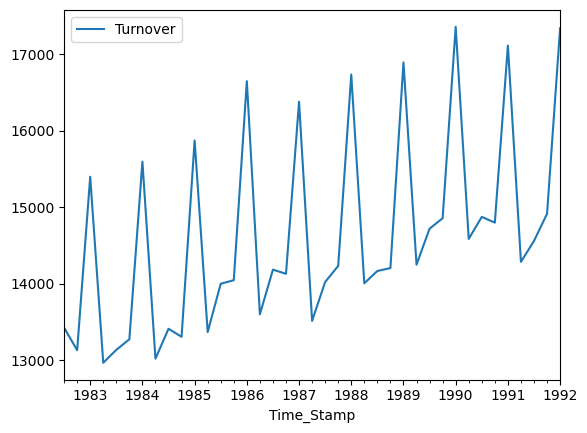

In [12]:
df.plot()

# Decompose the series to identify trends and seasonality

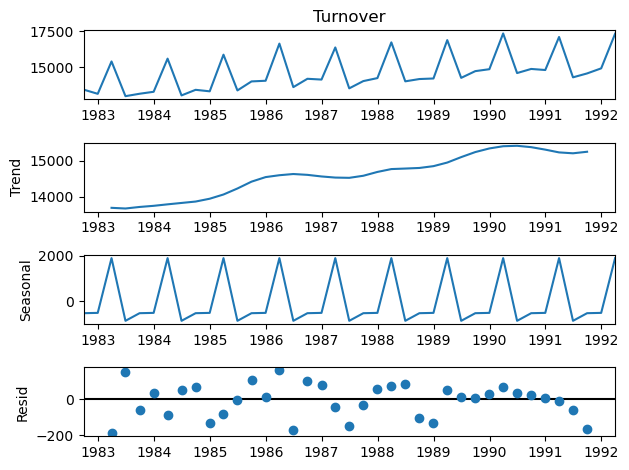

In [14]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Turnover'], model='additive')
decomposition.plot();

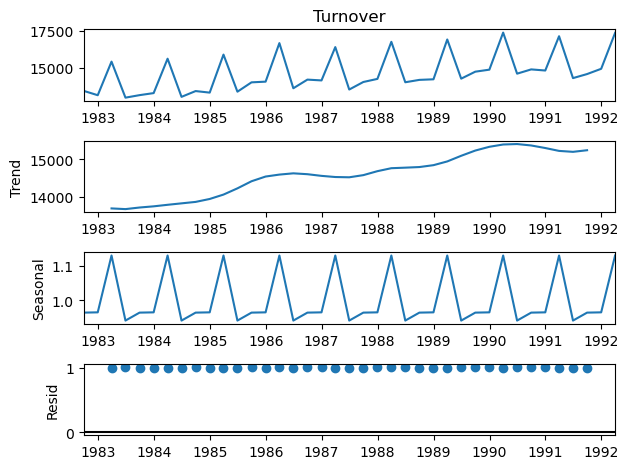

In [16]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Turnover'], model='mulitiplicative')
decomposition.plot();

### Inference on model
The residual values lies between -1 and 1 in additive model and it lies above 0 in multiplicative model. If the residual values consistently lie above 0, it implies that the fluctuations in the series are better represented by multiplication rather than addition. In other words, the variability in the series increases or decreases over time in a non-linear manner, which is characteristic of a multiplicative decomposition model.
By examining the residual values, we can infer the series is more likely to follow multiplicative decomposition model.

## Split the time series data into training and testing sets

In [19]:
# Define the proportion of data for training (e.g., 80%)
train_proportion = 0.8

# Calculate the number of quarters for training data
train_quarters = int(train_proportion * len(df))

# Split the data into training and testing sets
train_data = df.iloc[:train_quarters]
test_data = df.iloc[train_quarters:]

In [20]:
# Display the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (31, 1)
Testing set shape: (8, 1)


# Based on the trend and seasonality apply the Smoothing technique

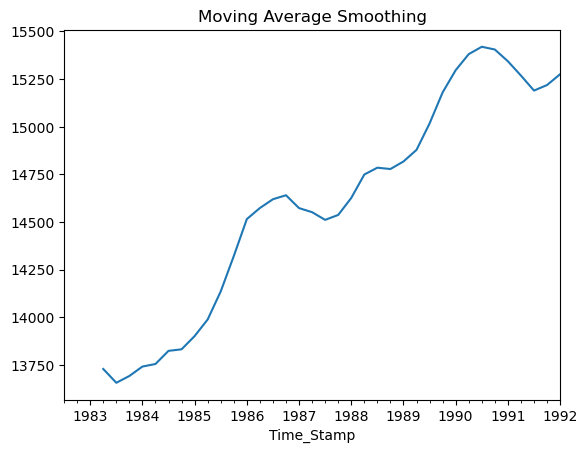

In [28]:
# Applying moving average smoothing
window_size = 4  
df['Moving_Avg'] = df['Turnover'].rolling(window=window_size).mean()
df['Moving_Avg'].plot()
plt.title("Moving Average Smoothing")
plt.show()

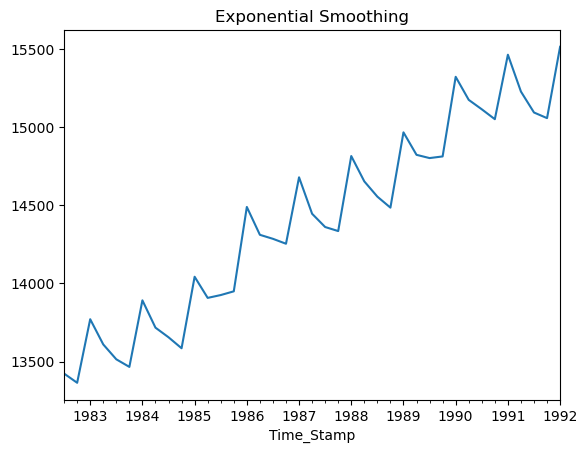

In [30]:
# Applying exponential smoothing
# Adjust the smoothing parameter alpha as needed (0 < alpha < 1)

df['Exp_Smooth'] = df['Turnover'].ewm(alpha = 0.2, adjust=False).mean()
df['Exp_Smooth'].plot()
plt.title("Exponential Smoothing")
plt.show()

# Find MAPE for your Model

In [31]:
# Calculate Mean Absolute Percentage Error (MAPE) for Moving Average
actual_values = df['Turnover'][window_size:]
predicted_values_ma = df['Moving_Avg'].dropna()
mape_ma = np.mean(np.abs((actual_values - predicted_values_ma) / actual_values)) * 100
print("MAPE for Moving Average:", mape_ma)

MAPE for Moving Average: 6.020603047001246


In [32]:
# Calculate Mean Absolute Percentage Error (MAPE) for Exponential Smoothing
actual_values = df['Turnover'][window_size:]
predicted_values_es = df['Exp_Smooth'].dropna()
mape_es = np.mean(np.abs((actual_values - predicted_values_es) / actual_values)) * 100
print("MAPE for Exponential Smoothing:", mape_es)


MAPE for Exponential Smoothing: 4.83947264168265


The MAPE (Mean Absolute Percentage Error) for the Moving Average model is approximately 6.02%, while for the Exponential Smoothing model, it is approximately 4.84%.

Comparing the two models, the Exponential Smoothing model seems to have a slightly lower MAPE, indicating that it provides a more accurate forecast compared to the Moving Average model. A lower MAPE suggests that the model's predictions are closer to the actual values on average. Therefore, based on the MAPE values, the Exponential Smoothing model may be preferred for forecasting the given time series data.